이것은 [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) 책의 노트북이다. 가독성을 위해 실행 가능한 코드 블록과 섹션 제목만 포함하고 책의 다른 모든 텍스트 단락, 그림 및 의사 코드는 생략한다.

**무슨 일이 일어나고 있는지 확인하고 싶다면 책과 함께 노트북을 사용하는 것을 권장한다.**

이 노트북은 TensorFlow 2.6 기반이다. (옮긴이: 버전 2.10.0, 애플 실리콘 M1 으로 테스트)

# 3 케라스와 텐서플로 소개

## 3.1 텐서플로는 무엇인가?

## 3.2 케라스는 무엇인가?

## 3.3 케라스 와 텐서플로: 간략한 역사

## 3.4 딥러닝 작업공간 설정

### 3.4.1 쥬피터 노트북: 딥러닝 실험을 작동하기 위한 선호되는 방식

### 3.4.2 구글 코랩 사용

#### 코랩으로 첫 번째 단계

#### pip로 패키지 설치

#### GPU 런타임 사용

## 3.5 텐서프로 첫 번째 단계

### 3.5.1 상수 텐서와 변수

**모두-1 또는 모두-0 텐서**

In [3]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

Metal device set to: Apple M1 Pro
tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


2022-11-28 18:50:17.905077: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-28 18:50:17.905364: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**무작위 텐서**

In [5]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[0.38061637]
 [0.32729012]
 [0.13917974]], shape=(3, 1), dtype=float32)


In [6]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.432693 ]
 [0.792892 ]
 [0.7121403]], shape=(3, 1), dtype=float32)


**넘파이 배열는 할당 가능하다**

In [7]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**텐서플로 변수 생성**

In [8]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.3544159 ],
       [ 0.7045493 ],
       [ 0.03666191]], dtype=float32)>


**텐서플로 변수에 값 할당**

In [9]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**텐서플로 변수의 하위 집합에 값 할당**

In [10]:
#v[0, 0].assign(3.) # InvalidArgumentError: Cannot assign a device for operation ResourceStridedSliceAssign

**`assign_add` 사용**

In [11]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[2.],
       [2.],
       [2.]], dtype=float32)>

### 3.5.2 텐서 연산: 텐서플로 수학

**약간의 기본 수학 연산**

In [12]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b) # a @ b 와 동일 연산
e *= d

### 3.5.3 경사 테이프 API에 두 번째 살펴보기

**`GradientTape`사용**

In [13]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

**상수 텐서 입력으로 `GradientTape` 사용하기**

In [14]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**중첩된 그래디언트 테이프를 사용하여 2차 그래디언트 계산**

In [15]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

### 3.5.4 종단 간 예제: 순수 텐서플로의 선형 분류기

**2D 평면에서 두 클래스의 임의 점 생성**

In [16]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

옮긴이:
다변량 정규, 다중 정규 또는 가우시안 분포는 1차원 정규 분포를 높은 차원으로 일반화한다.
이런 분포는 평균과 공분산 행렬로 지정된다.

**두 클래스를 (2000, 2) 형태의 한 배열로 쌓기**

In [17]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**(0과 1)로 연관된 타깃 생성**

In [18]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

In [19]:
targets

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

**두 클래스의 점을 그래프로 그리기**

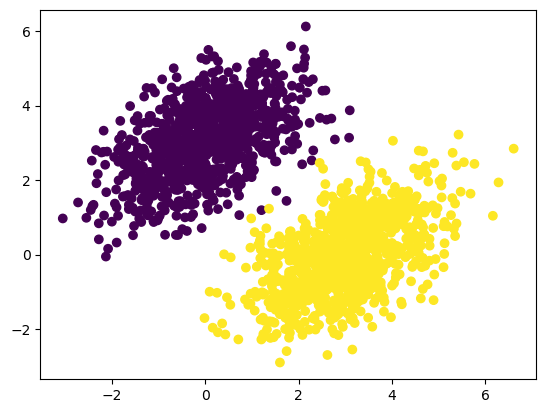

In [20]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**선형 분류기 변수 생성**

In [21]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**전방 경로 함수**

In [22]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**평균 제곱 오차 손실 함수**

In [23]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**훈련 단계 함수**

In [24]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**배치 훈련 루프**

In [25]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"손실 단계 {step} : {loss:.4f}")

손실 단계 0 : 4.2099
손실 단계 1 : 0.4762
손실 단계 2 : 0.1747
손실 단계 3 : 0.1259
손실 단계 4 : 0.1120
손실 단계 5 : 0.1036
손실 단계 6 : 0.0964
손실 단계 7 : 0.0900
손실 단계 8 : 0.0841
손실 단계 9 : 0.0788
손실 단계 10 : 0.0739
손실 단계 11 : 0.0695
손실 단계 12 : 0.0655
손실 단계 13 : 0.0618
손실 단계 14 : 0.0584
손실 단계 15 : 0.0554
손실 단계 16 : 0.0526
손실 단계 17 : 0.0500
손실 단계 18 : 0.0477
손실 단계 19 : 0.0456
손실 단계 20 : 0.0437
손실 단계 21 : 0.0419
손실 단계 22 : 0.0403
손실 단계 23 : 0.0388
손실 단계 24 : 0.0375
손실 단계 25 : 0.0363
손실 단계 26 : 0.0352
손실 단계 27 : 0.0342
손실 단계 28 : 0.0332
손실 단계 29 : 0.0324
손실 단계 30 : 0.0316
손실 단계 31 : 0.0309
손실 단계 32 : 0.0303
손실 단계 33 : 0.0297
손실 단계 34 : 0.0292
손실 단계 35 : 0.0287
손실 단계 36 : 0.0283
손실 단계 37 : 0.0279
손실 단계 38 : 0.0275
손실 단계 39 : 0.0272


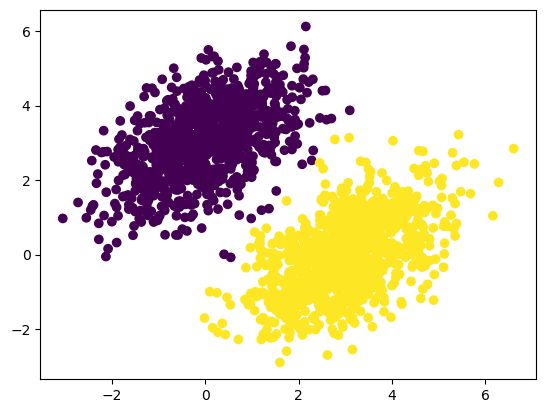

In [26]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

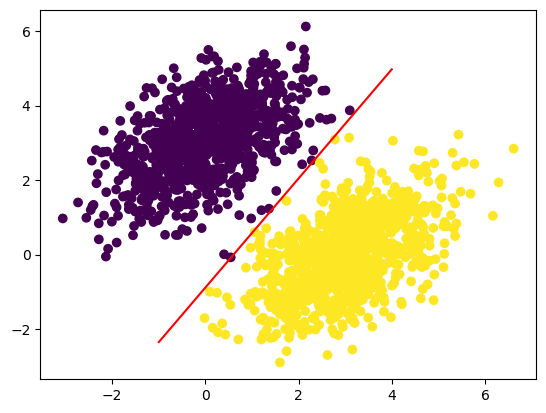

In [27]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1] # prediction == [[w1], [w2]] @ [x, y] + b == w1 * x + w2 * y + b
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## 3.6 신경망 해부: 핵심 케라스 API 이해

### 3.6.1 층: 딥러닝의 구성 요소

#### 케라스의 기본 층 클래스

**`Layer` 클래스로 구현된 `Dense` 층**

In [28]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [29]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### 자동 형태 추론: 즉시 층 구성 

In [30]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [31]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [32]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### 3.6.2 층에서 모델로

### 3.6.3 "컴파일" 단계: 학습 과정 구성

In [33]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [34]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### 3.6.4 손실 함수 선택

### 3.6.5 `fit()` 메소드 이해

**넘파이 데이터로 `fit()` 호출**

In [35]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5


2022-11-28 18:52:42.366053: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 1/16 [>.............................] - ETA: 5s - loss: 0.5571 - binary_accuracy: 0.7188

2022-11-28 18:52:42.606903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 8ms/step - loss: 0.5127 - binary_accuracy: 0.7630
Epoch 2/5
16/16 [==============================] - 0s 6ms/step - loss: 0.4234 - binary_accuracy: 0.7880
Epoch 3/5
16/16 [==============================] - 0s 5ms/step - loss: 0.3571 - binary_accuracy: 0.8065
Epoch 4/5
16/16 [==============================] - 0s 5ms/step - loss: 0.3018 - binary_accuracy: 0.8220
Epoch 5/5
16/16 [==============================] - 0s 5ms/step - loss: 0.2553 - binary_accuracy: 0.8445


In [36]:
history.history

{'loss': [0.512656569480896,
  0.42343536019325256,
  0.35708582401275635,
  0.30183932185173035,
  0.25525543093681335],
 'binary_accuracy': [0.7630000114440918,
  0.7880000472068787,
  0.8065000176429749,
  0.8220000267028809,
  0.8445000648498535]}

### 3.6.6 검증 데이터에서 손실과 측정 지표 모니터링

**`validation_data` 인수 사용**

In [38]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
20/88 [=====>........................] - ETA: 0s - loss: 0.2007 - binary_accuracy: 0.8844

2022-11-28 18:53:54.572254: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


88/88 [==============================] - 1s 8ms/step - loss: 0.1030 - binary_accuracy: 0.9457 - val_loss: 0.0976 - val_binary_accuracy: 0.9717
Epoch 2/5
 1/88 [..............................] - ETA: 0s - loss: 0.0835 - binary_accuracy: 1.0000

2022-11-28 18:53:55.191105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


88/88 [==============================] - 1s 6ms/step - loss: 0.0732 - binary_accuracy: 0.9550 - val_loss: 0.0342 - val_binary_accuracy: 1.0000
Epoch 3/5
88/88 [==============================] - 1s 6ms/step - loss: 0.0675 - binary_accuracy: 0.9671 - val_loss: 0.3224 - val_binary_accuracy: 0.7883
Epoch 4/5
88/88 [==============================] - 1s 7ms/step - loss: 0.0769 - binary_accuracy: 0.9564 - val_loss: 0.0532 - val_binary_accuracy: 1.0000
Epoch 5/5
88/88 [==============================] - 1s 6ms/step - loss: 0.0724 - binary_accuracy: 0.9571 - val_loss: 0.0394 - val_binary_accuracy: 0.9983


### 3.6.7 추론: 훈련 후 모델 사용

In [39]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 4ms/step
[[0.9524966 ]
 [0.3805399 ]
 [1.0038661 ]
 [0.95242834]
 [0.92447734]
 [0.7704971 ]
 [0.92047167]
 [0.2002927 ]
 [0.15326935]
 [0.1383507 ]]


2022-11-28 18:54:06.912583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


## 3.7 요약